In [87]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from pprint import pprint

In [88]:
blob_file = "../data/hw5_blob.csv"
circle_file = "../data/hw5_circle.csv"


In [89]:
def load_points(f_name):
    with open(f_name) as f:
        res = []
        for l in f:
            x,y = l.split(",")
            res.append([float(x), float(y)])
        return np.array(res)

blobs = load_points(blob_file)
circles = load_points(circle_file)

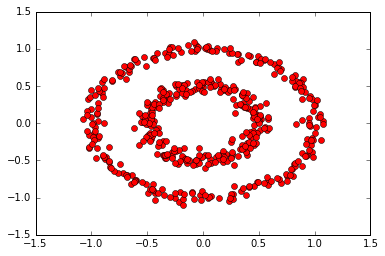

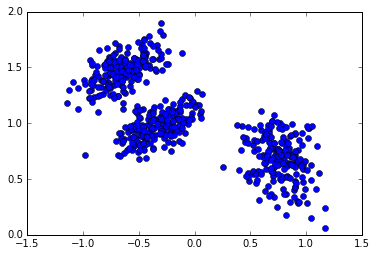

In [90]:
plt.plot(*zip(*circles), marker='o', color='r', ls='')
plt.show()

plt.plot(*zip(*blobs), marker='o', color='b', ls='')
plt.show()

In [109]:
def k_means(k, pts, get_indices=False, silent=True):
    N = len(pts)
    assert k <= N
    print("K=%d, N=%d" % (k, N))
    # pick random k points
    pos = set()
    while len(pos) < k:
        r = np.random.randint(N)
        pos.add(r)
    centroids = []
    for p in pos:
        centroids.append(tuple(pts[p]))
   
    change = float('inf')
    last_change = 0.
    conv_tol = 1e-5
    itr, max_iters = 0, 100
    while change > 1e-5 and itr < max_iters:
        itr += 1
        # assign cluster to each point
        asgn = {}
        indices = {}
        for ct in centroids:
            asgn[ct] = []
            indices[ct] = []
        for idx, pt in enumerate(pts):
            mindist = float('inf')
            a = None
            for ct in centroids:
                dist = sp.spatial.distance.cdist([ct], [pt])
                if dist < mindist:
                    mindist = dist
                    a = ct
            asgn[a].append(pt)
            indices[a].append(idx)

        # compute means of each cluster
        oldcentr = centroids
        centroids = []
        for ct, cluster in asgn.items():
            centroids.append(tuple(np.array(cluster).mean(axis=0)))
        dist_matrix = sp.spatial.distance.cdist(oldcentr, centroids) 
        # has distance between each pair of {new, old} centroids
        # need the diagonal values
        change = dist_matrix.trace()
        if not silent:
            print("Movement in centroids", change)
    return indices if get_indices else asgn


K=2, N=500
K=3, N=500
K=5, N=500
K=2, N=600
K=3, N=600
K=5, N=600


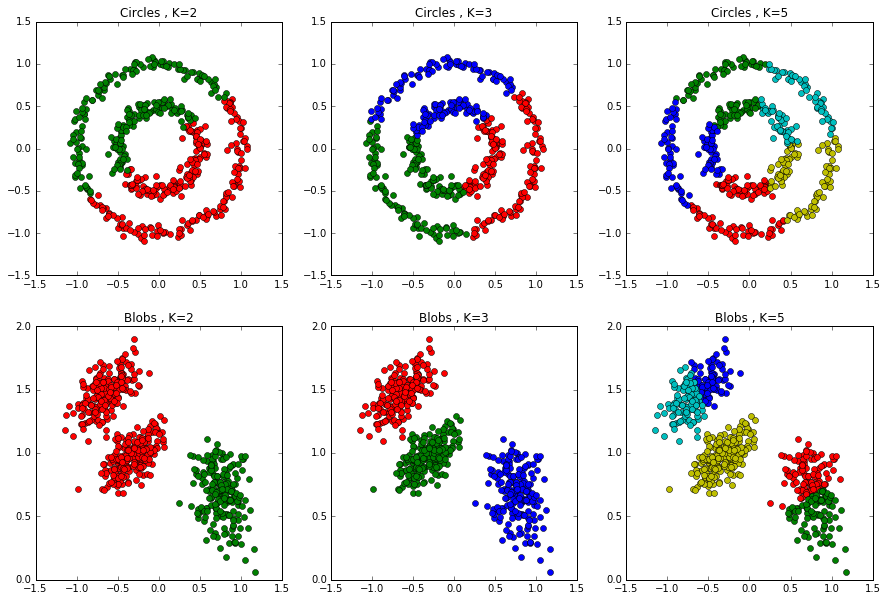

In [113]:
colors = ['r', 'g', 'b', 'y', 'c', 'k']
plt.figure(1, figsize=(15, 10))

ks = {2,3,5}
dss = {'Blobs': blobs, 'Circles': circles}
j = 1
for title, ds in dss.items():
    for k in ks:
        clstrs = k_means(k, ds)
        plt.subplot(2, 3, j)
        i = 0
        for cnt, cpts in clstrs.items():
            plt.plot(*zip(*cpts), marker='o', color=colors[i], ls='')
            i += 1
        plt.title("%s , K=%d" % (title, k))
        j += 1
        
plt.show()

# Kernel

K=2, N=500


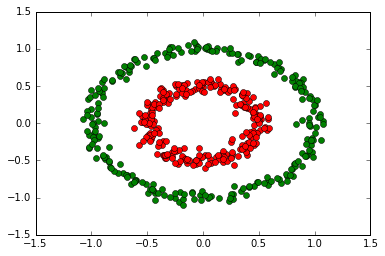

In [111]:
center = [0.0, 0.0]
newdim = sp.spatial.distance.cdist([center], circles).transpose()
clusters = k_means(2, newdim, get_indices=True)
i = 0
for cnt, cpts in clusters.items():
    cpts = map(lambda x: circles[x], cpts)
    plt.plot(*zip(*cpts), marker='o', color=colors[i], ls='')
    i += 1
plt.show()